In [6]:
require(ggplot2)
require(reshape2)
require(lme4)
require(car)

Loading required package: ggplot2
Loading required package: reshape2
Loading required package: lme4
Loading required package: Matrix
Loading required package: car


In [ ]:
d=read.csv("~/Documents/DE/DE_DATA.csv")

In [2]:
colnames(d)

[1] "Date_pre"         "Date_post"        "Site"             "Density"         
 [5] "Diversity"        "Color"            "Number"           "Species"         
 [9] "Length_pre"       "Width_pre"        "Height_pre"       "Weight_pre"      
[13] "Notes_pre"        "POST_DEAD_ALIVE"  "Length_post"      "Width_post"      
[17] "Height_post"      "Weight_post"      "Genetics_Weight"  "Dry_Weight_plate"
[21] "Dry_weight_final" "Dry_weight_shell" "RFTM_date"        "RFTM_score"      
[25] "peacrabs"         "Notes_post"       "LiveMM"

In [4]:
d$Treatment=paste0(d$Density, d$Diversity)

In [106]:
d=d[!d$POST_DEAD_ALIVE=="DEAD",]
d=d[!d$POST_DEAD_ALIVE=="MISSING",]
d=d[!d$POST_DEAD_ALIVE=="PREDATION",]

In [7]:
numbers=table(d$Species, d$Color, d$Treatment, d$Site)
numbers=as.data.frame.table(numbers, response=Species)
colnames(numbers)=c("Species", "Color", "Treatment", "Site", "Number")
numbers=dcast(numbers, Treatment+Site+Color~Species)

numbers$CVmor=ifelse(numbers$Treatment=='HIGHHIGH', 100-((numbers$CV/6)*100),
    ifelse(numbers$Treatment=='HIGHLOW', 100-((numbers$CV/18)*100), 
      ifelse(numbers$Treatment=='LOWHIGH', 100-((numbers$CV/3)*100),
          ifelse(numbers$Treatment=='LOWLOW', 100-((numbers$CV/9)*100), 100-((numbers$CV/18)*100))
             )
           )
       )   


numbers$CVsur=ifelse(numbers$Treatment=='HIGHHIGH', (numbers$CV/6)*100,
    ifelse(numbers$Treatment=='HIGHLOW', (numbers$CV/18)*100, 
      ifelse(numbers$Treatment=='LOWHIGH', (numbers$CV/3)*100,
          ifelse(numbers$Treatment=='LOWLOW', (numbers$CV/9)*100, (numbers$CV/18)*100)
             )
           )
       )

Using Number as value column: use value.var to override.


In [8]:
dc=merge(d, numbers, by=c("Treatment", "Site", "Color"))

In [9]:
dc[c(10:13, 16:19, 21:25)]=apply(dc[c(10:13, 16:19, 21:25)], 2, as.character)
dc[c(10:13, 16:19, 21:25)]=apply(dc[c(10:13, 16:19, 21:25)], 2, as.numeric)

Warning message in apply(dc[c(10:13, 16:19, 21:25)], 2, as.numeric):
“NAs introduced by coercion”Warning message in apply(dc[c(10:13, 16:19, 21:25)], 2, as.numeric):
“NAs introduced by coercion”Warning message in apply(dc[c(10:13, 16:19, 21:25)], 2, as.numeric):
“NAs introduced by coercion”Warning message in apply(dc[c(10:13, 16:19, 21:25)], 2, as.numeric):
“NAs introduced by coercion”Warning message in apply(dc[c(10:13, 16:19, 21:25)], 2, as.numeric):
“NAs introduced by coercion”Warning message in apply(dc[c(10:13, 16:19, 21:25)], 2, as.numeric):
“NAs introduced by coercion”Warning message in apply(dc[c(10:13, 16:19, 21:25)], 2, as.numeric):
“NAs introduced by coercion”

In [10]:
cv=dc[dc$Species=="CV",]
gd=dc[dc$Species=="GD",]
mm=dc[dc$Species=="MM",]

In [16]:
multi = function(x) {
      c(avg = mean(x, na.rm=TRUE), se = sd(x, na.rm=TRUE)/sqrt(length(x)) )
}

In [12]:
prevalence=with(cv, tapply(peacrabs, list(Density, Diversity, Site, Color),  function(x) 100*(sum(x>0, na.rm=TRUE)/sum(!is.na(x)))))
prevalence=na.omit(as.data.frame.table(prevalence, response=peacrabs))
colnames(prevalence)=c("Density", "Diversity","Site","Color", "peacrabs")

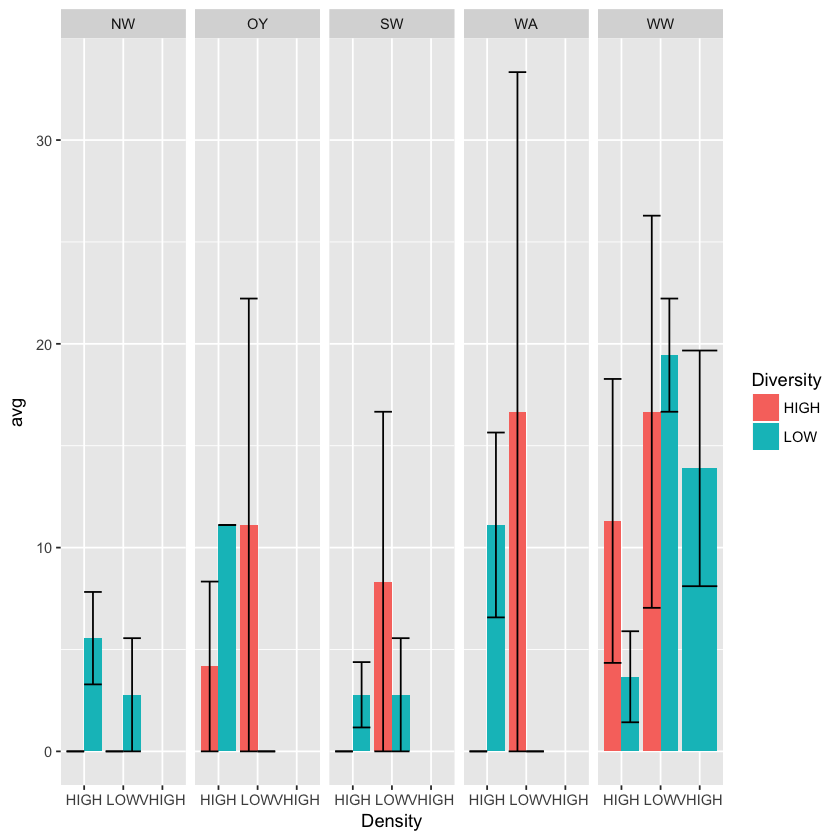

In [17]:
prevCV=aggregate(peacrabs~Density+Diversity+Site, data=prevalence, FUN=multi)
prevCV$avg=prevCV$peacrabs[,1]
prevCV$sd=prevCV$peacrabs[,2]
prevCV=prevCV[-4]
ggplot(prevCV, aes(x = Density, y = avg, fill=Diversity)) +
        geom_bar(stat="identity", position="dodge")+facet_grid(~Site)+
 geom_errorbar(aes(ymin=avg-sd, ymax=avg+sd), position="dodge") 

In [116]:
head(data)

,Date_pre,Date_post,Site,Density,Diversity,Color,Number,Species,Length_pre,Width_pre,⋯,RFTM_date,RFTM_score,peacrabs,Notes_post,LiveMM,Height_change,Weight_change,Length_change,Width_change,Dry_weight
1,5/30/17,NA,NW,HIGH,HIGH,B,1,CV,14.8,16.65,⋯,9/25-10/2,0,0,,3,12.19,10.81,31.45,28.08,NA
2,5/30/17,NA,NW,HIGH,HIGH,B,2,CV,21.2,17.80,⋯,,,0,,3,15.21,18.21,26.95,31.17,0.46247
5,5/28/17,NA,NW,HIGH,HIGH,B,5,GD,115.9,43.80,⋯,9/25-10/2,0,0,pearl,3,0.86,65.28,1.06,-0.94,NA
6,5/28/17,NA,NW,HIGH,HIGH,B,6,GD,99.4,39.40,⋯,,,0,,3,0.11,38.77,-3.24,5.31,1.05282
8,5/28/17,NA,NW,HIGH,HIGH,B,8,GD,115.2,48.60,⋯,9/25-10/2,0,0,,3,0.26,72.35,-0.56,-2.60,NA
10,5/28/17,NA,NW,HIGH,HIGH,B,10,GD,110.3,41.10,⋯,,,0,,3,1.27,50.53,-1.69,-1.10,1.20349


In [126]:
weight=data[!is.na(data$Dry_weight),]

In [127]:
head(weight)

,Date_pre,Date_post,Site,Density,Diversity,Color,Number,Species,Length_pre,Width_pre,⋯,RFTM_date,RFTM_score,peacrabs,Notes_post,LiveMM,Height_change,Weight_change,Length_change,Width_change,Dry_weight
2,5/30/17,NA,NW,HIGH,HIGH,B,2,CV,21.2,17.8,⋯,,,0,,3,15.21,18.21,26.95,31.17,0.46247
6,5/28/17,NA,NW,HIGH,HIGH,B,6,GD,99.4,39.4,⋯,,,0,,3,0.11,38.77,-3.24,5.31,1.05282
10,5/28/17,NA,NW,HIGH,HIGH,B,10,GD,110.3,41.1,⋯,,,0,,3,1.27,50.53,-1.69,-1.10,1.20349
13,5/30/17,NA,NW,HIGH,HIGH,B,13,CV,18.2,18.6,⋯,,,0,,3,10.55,10.56,23.82,21.05,0.31580
18,5/28/17,NA,NW,HIGH,HIGH,B,18,GD,93.2,37.9,⋯,,,0,,3,0.86,28.18,0.61,1.18,0.88688
20,5/28/17,NA,NW,HIGH,HIGH,P,2,GD,114.9,44.9,⋯,,,0,,4,1.65,73.14,0.00,-0.06,1.36900


In [148]:
weight$Dry_weight

[1]  0.46247  1.05282  1.20349  0.31580  0.88688  1.36900  0.36863  1.19010
  [9]  0.43330  0.15165  1.18910  0.14356  1.38400  0.07640  0.14580  1.21560
 [17]  0.20180  0.16100  1.16640  0.45589  0.12260  1.32870  0.26140  0.41220
 [25]  0.73380  0.48790  0.32498  0.31590  0.36643  0.30140  0.33560  0.23900
 [33]  0.41137  0.26424  0.38568  0.11380  0.65470  0.40160  0.56240  0.33000
 [41]  0.31840  0.29690  0.32840  0.35555  0.04150  0.54062  0.52980  0.33279
 [49]  0.25500  0.46520  0.39131  0.30822  0.20084  0.42606  0.36360  0.69621
 [57]  1.34839  0.47416  0.20590  1.44180  1.07750  0.41080  0.14010  0.26090
 [65]  0.29640  0.30645  0.40920  0.50300  0.40520  0.63180  0.45073  0.39112
 [73]  0.22340  0.10387  0.84800  0.38490  0.18365  1.27290  0.61010  0.06880
 [81]  1.71050  0.08130  0.34160  1.09470  0.31100  1.10070  0.98310  0.37450
 [89]  0.49600  0.95850  1.17140  1.33070  0.37650  0.24070  1.20040  0.37460
 [97]  1.29250  0.43690  1.55130  0.54751  0.21970  0.36060 -0.10328  0.35720
[105]  0.56260  0.37810  0.38990  0.43640  0.45750 -0.60490  0.47650  0.19520
[113]  0.32850  0.41990  0.58270  0.46390  1.25170  0.60290  0.94540  0.17310
[121]  0.61670  0.54010  1.36380  0.51190  0.32120  0.44690  0.08030  0.19240
[129]  0.38800  0.33930  0.50990  0.54050  0.47670 10.50310  0.37847  0.45661
[137]  0.37790  0.30020  0.47100  0.42840  1.60440  1.13870  0.64080  1.22050
[145]  0.52080  0.40010  1.48360  0.23760  0.15420  0.90060  0.60650  0.10180
[153]  0.32940  0.42200  1.27080  0.38890  1.26750  0.49640  0.31511  0.56480
[161]  0.53820  0.49130  0.40020  0.39930  0.20020  0.37420  0.23810  0.39620
[169]  0.54630  0.66200  0.27260  0.44840  0.39620  0.50070  0.39330  0.38620
[177]  0.49530  0.30690  0.42580 -0.57690  0.39990  0.48290  0.47970  0.29130
[185]  0.51730  0.54090  1.79260  0.61060  0.14290  0.32910  1.24740  0.39230
[193]  1.43700  0.57970  1.19300  0.51070  0.70660  0.44200  0.39000 -0.79470
[201]  0.27130  0.51520  0.64010  0.52590  0.24440  0.27910  0.34520  0.83180
[209]  0.53590  0.64540  0.47630  0.23770  1.91100  0.22810  1.58240  0.18470
[217]  2.09300  0.33290  1.73250  0.32080  0.21130  0.17200  0.66380  1.97060
[225]  2.21420  0.03130  0.17960  2.08050  2.08210  0.20530  0.26480  0.31500
[233]  0.18670  0.22630  0.27900  0.42690  0.18420  0.27890  0.31450  0.08960
[241]  0.26740 -0.84760  2.03900  1.59240  0.15670  0.28610  0.18780  0.26170
[249]  0.22440  0.08960  1.42190  0.12390  1.09030  1.12890  0.23460  1.51930
[257]  0.06200  1.15590  1.30580  0.11420  0.05790  0.79870  1.62460  1.01600
[265]  0.15800  0.06140  0.09470  1.36200  0.03010  0.27740  0.11370  0.14850
[273]  0.05480  0.12360  0.08740  0.10300  0.15540  0.08950  0.09370  0.05060
[281]  0.35700  0.31010  0.20570  0.03080  1.51050  0.20170  0.02200  0.89110
[289]  0.17940  0.04100  0.17530  0.22160  1.10810  0.92380  0.03770  0.06490
[297]  0.09060  0.16720  0.01330  0.01010  0.09300  0.09890  0.12830  0.13980
[305]  0.44510 -0.82940  0.18080  0.15290  0.07610  0.15000  0.15680  0.06630
[313]  0.21490  0.12210  0.12700  0.07590  0.17110  0.21850  0.18240  0.13280
[321]  0.28260  0.15241  0.09960  0.04450  0.19900  0.11730  0.04780  0.26900
[329]  0.15490  0.20330  0.23740  0.17000  0.29050  0.13740  0.21680  0.12700
[337]  0.26600

In [128]:
require(ggplot2)

In [145]:
plot=ggplot(data=weight, aes(x=peacrabs, y=Dry_weight))+
geom_point(data=weight)+facet_grid(Species~.)

Warning message:
“Removed 1 rows containing missing values (geom_point).”

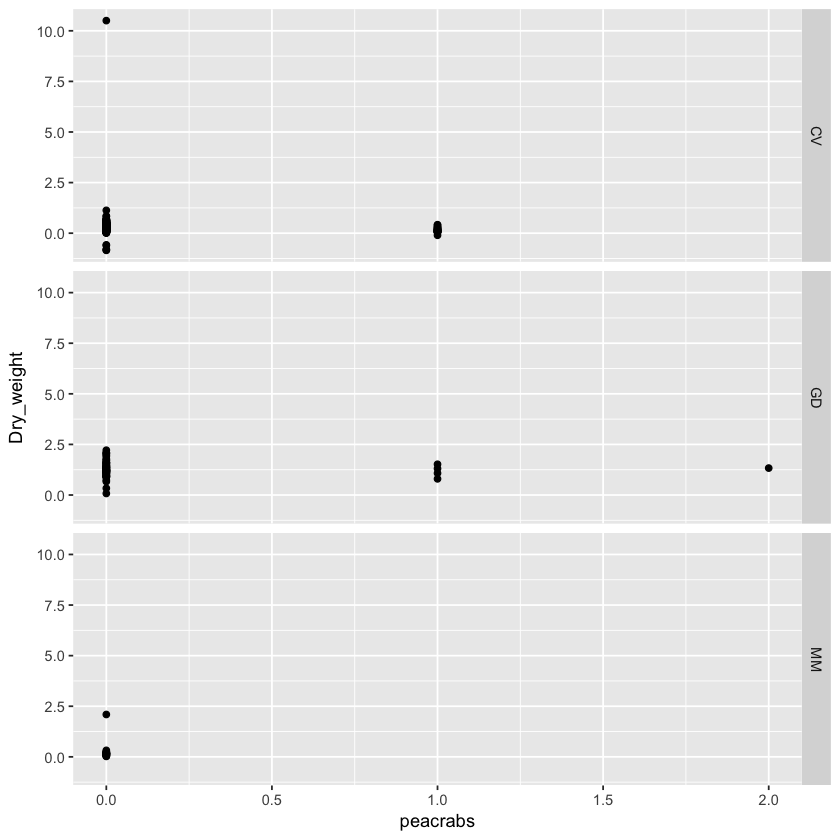

In [146]:
plot